# Random Forest Hyperparameter Tuning

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [23]:
file_path = '../data/training_data.csv'
data = pd.read_csv(file_path)

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=3)

# RF

In [25]:
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)
roc_auc_score(y_val, y_pred, multi_class='ovr', average='weighted')

0.9999176334273996

In [48]:
# Check how AUC depends on the number of trees

aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)
    auc = roc_auc_score(y_val, y_pred, multi_class='ovr', average='weighted')
    print('%s -> %.8f' % (i, auc))
    aucs.append(auc)

10 -> 0.99991763
20 -> 0.99999908
30 -> 0.99999880
40 -> 0.99999888
50 -> 0.99999895
60 -> 0.99999909
70 -> 0.99999899
80 -> 0.99999909
90 -> 0.99999896
100 -> 0.99999913
110 -> 0.99999903
120 -> 0.99999905
130 -> 0.99999895
140 -> 0.99999903
150 -> 0.99999910
160 -> 0.99999918
170 -> 0.99999923
180 -> 0.99999913
190 -> 0.99999910
200 -> 0.99999923


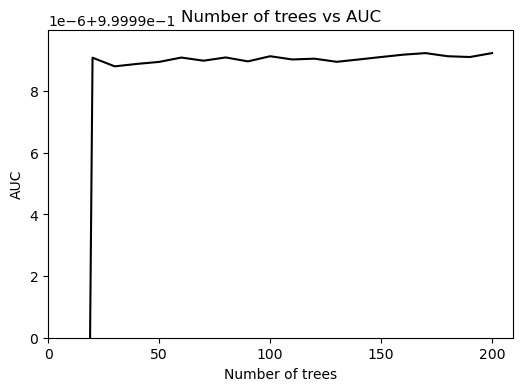

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

plt.ylim(0.99999000, 0.99999999)

plt.show()


In [51]:
# Tuninig the max_depth parameter:

all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 101, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_pred, multi_class='ovr', average='weighted')
        print('%s -> %.8f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[depth] = aucs
    print()

depth: 5
10 -> 0.99999542
20 -> 0.99999690
30 -> 0.99999616
40 -> 0.99999670
50 -> 0.99999742
60 -> 0.99999746
70 -> 0.99999737
80 -> 0.99999748
90 -> 0.99999738
100 -> 0.99999756

depth: 10
10 -> 0.99976835
20 -> 0.99999852
30 -> 0.99999885
40 -> 0.99999894
50 -> 0.99999907
60 -> 0.99999910
70 -> 0.99999915
80 -> 0.99999910
90 -> 0.99999910
100 -> 0.99999910

depth: 20
10 -> 0.99977041
20 -> 0.99999853
30 -> 0.99999885
40 -> 0.99999906
50 -> 0.99999907
60 -> 0.99999912
70 -> 0.99999920
80 -> 0.99999920
90 -> 0.99999920
100 -> 0.99999910



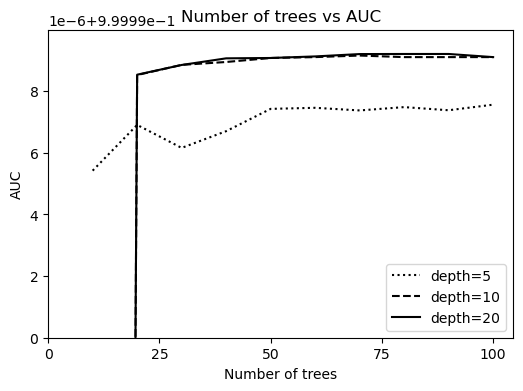

In [52]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 101, 10))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')
    
plt.xticks(range(0, 101, 25))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

plt.ylim(0.99999000, 0.99999999)

plt.show()

In [36]:
# Tuning the min_samples_leaf parameter

all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 101, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_pred, multi_class='ovr', average='weighted')
        print('%s -> %.8f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.99999746
30 -> 0.99999841
50 -> 0.99999858
70 -> 0.99999840
90 -> 0.99999860

min_samples_leaf: 5
10 -> 0.99999630
30 -> 0.99999805
50 -> 0.99999784
70 -> 0.99999790
90 -> 0.99999813

min_samples_leaf: 10
10 -> 0.99999392
30 -> 0.99999659
50 -> 0.99999677
70 -> 0.99999694
90 -> 0.99999723



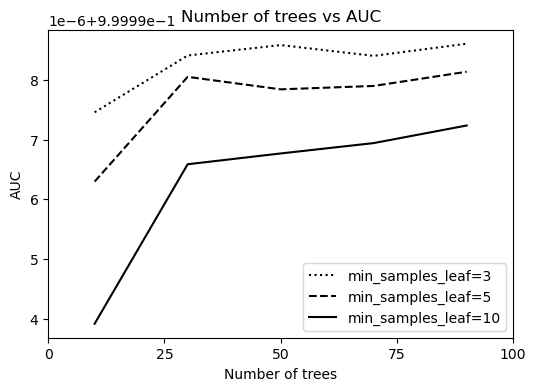

In [37]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 101, 20))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')
    
plt.xticks(range(0, 101, 25))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

plt.show()

In [57]:
# Training the final model:

rf = RandomForestClassifier(n_estimators=80, max_depth=10, min_samples_leaf=3, random_state=1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_val)
auc = roc_auc_score(y_val, y_pred_rf, multi_class='ovr', average='weighted')
auc

0.999998473743616

In [46]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='black')

#fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
#plt.plot(fpr, tpr, color='black', linestyle='dashed')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

ValueError: multiclass format is not supported

<Figure size 500x500 with 0 Axes>